In [17]:
import cropper
import dm_den
import dm_den_viz
import math
import paths
import itertools
import pickle
import numpy as np
from progressbar import ProgressBar
from staudt_utils import print_eq
from astropy import units as u, constants as c
from adjustText import adjust_text

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from matplotlib.lines import Line2D

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=17
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=14
rcParams['figure.facecolor']='white'

In [3]:
df = dm_den.load_data('dm_stats_20220629.h5')
df_drop = df.drop(['m12w', 'm12z'])

In [169]:
disp_label = '$\\sigma_\mathrm{DM}\,/\,'\
             '\\left[\mathrm{km\,s^{-1}}\\right]$'
gmr_label = '$\sqrt{Gm/r}\,/\,'\
              '\\left[\mathrm{km\,s^{-1}}\\right]$'
vc_label = '$v_\mathrm{c}\,/\,[\mathrm{km\,s^{-1}}]$'
v_1e4_label = '$\\overline{|v_{\phi,'\
                   '_{T<10^{4}\,\mathrm{K}}}|}'\
                   '\,/\,[\mathrm{km\,s^{-1}}]$'
v_1e3_label = '$\\overline{|v_{\phi,'\
                   '_{T<10^{3}\,\mathrm{K}}}|}'\
                   '\,/\,[\mathrm{km\,s^{-1}}]$'
den_label = '$\\rho_\mathrm{DM}\,/\,\\left[\mathrm{M_\odot kpc^{-3}}\\right]$'

In [5]:
def regress_line(x, reg):
    # Take regression parameters and an x; return the log y value
    return np.log10(10.**reg[1]*x**reg[0][0])

def plt_mw(ax, vcirc, reg):
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    y = regress_line(vcirc, reg)
    ax.vlines(np.log10(vcirc), 
                  ymin=ylim[0],
                  ymax=y)
    ax.hlines(y,
              xmin=xlim[0],
              xmax=np.log10(vcirc))
    ax.set_ylim(*ylim)
    ax.set_xlim(*xlim)
    return None

In [6]:
# v0 ranges from Sofue 2020
v0_sofu=238.
dv0_sofu=14.
log_dv0_neg = np.log10(v0_sofu/(v0_sofu-dv0_sofu))
log_dv0_pos = np.log10((v0_sofu+dv0_sofu)/v0_sofu)

# Density ranges from Sofue 2020
rho_sofu = 0.39*u.GeV/c.c**2.*u.cm**-3.
drho_sofu = 0.09*u.GeV/c.c**2.*u.cm**-3.
rho_sofu = rho_sofu.to(u.M_sun*u.kpc**-3.).value
drho_sofu = drho_sofu.to(u.M_sun*u.kpc**-3.).value
rho_min_sofu = np.log10(rho_sofu-drho_sofu)
rho_max_sofu = np.log10(rho_sofu+drho_sofu)

# Dispersion

## First Plot

====  ========  ========  ========  ===========
..       coeff       +/-    t-stat     p-values
====  ========  ========  ========  ===========
X_0   0.549957  0.491966   2.49079  0.0319472
X_1   0.803257  0.208825   8.57066  6.40774e-06
====  ========  ========  ========  ===========
t_c = 2.2
t-test type: 2 tailed, 5% significance

=======  =======  ==============
      F      F_c    significance
=======  =======  ==============
73.4563  10.0443            0.01
=======  =======  ==============
r2 = 0.88
r2a = 0.87
====  ========  ========  ========  ===========
..       coeff       +/-    t-stat     p-values
====  ========  ========  ========  ===========
X_0   0.552046  0.453675   2.71127  0.0218859
X_1   0.802391  0.192195   9.30223  3.07187e-06
====  ========  ========  ========  ===========
t_c = 2.2
t-test type: 2 tailed, 5% significance

=======  =======  ==============
      F      F_c    significance
=======  =======  ==============
86.5314  10.0443            0.01
=======  =

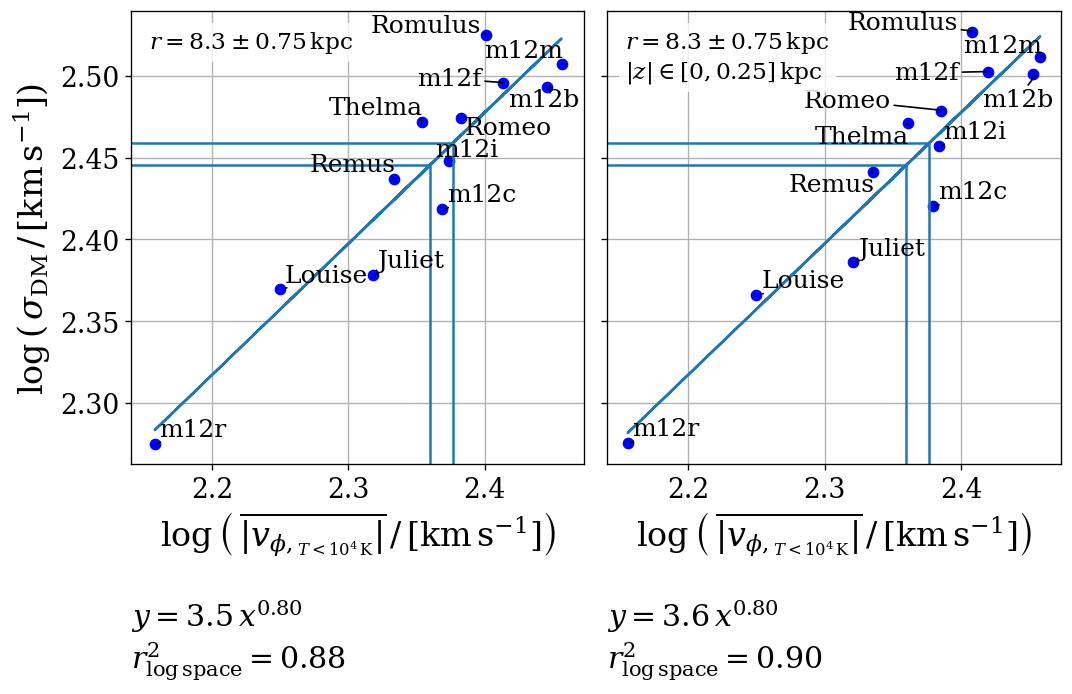

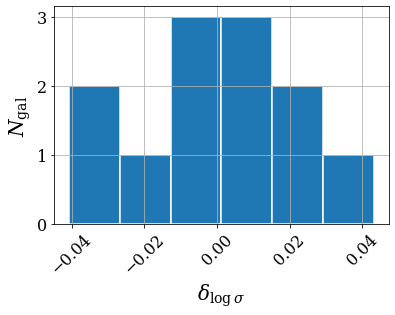

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True,
                        dpi=120)
fig.subplots_adjust(wspace=0.05)
axs = axs.ravel()

textxy = (0.04, 0.96)
fontsize = 14
reg_shell = dm_den_viz.ax_slr(axs[0], 'dm_stats_20220629.h5',
                              'v_dot_phihat_shell(T<=1e4)',
                              'disp_dm_shell_cyl',
                              xlabel=v_1e4_label,
                              ylabel=disp_label,
                              xadjustment='log', yadjustment='log',
                              formula_y=-0.45, dropgals=['m12w','m12z'],
                              arrowprops={'arrowstyle':'-'})
axs[0].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$'\
                            .format(df.attrs['dr']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

reg_disc = dm_den_viz.ax_slr(axs[1],'dm_stats_20220629.h5',
                             'v_dot_phihat_disc(T<=1e4)',
                             'disp_dm_disc_cyl',
                             xlabel=v_1e4_label,
                             ylabel=disp_label,
                             xadjustment='log', yadjustment='log',
                             formula_y=-0.45, dropgals=['m12w','m12z'],
                             arrowprops={'arrowstyle':'-'})
axs[1].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$\n'
                '$|z|\in[0,{1:0.2f}]\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.,
                                                            df.attrs['dz']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[1].set_ylabel('')

for vcirc in [229., 238.]:
    plt_mw(axs[0], vcirc, reg_shell)
    plt_mw(axs[1], vcirc, reg_disc)

plt.show()


################################################################################
# Errors
################################################################################

df['disp_errors_disc'] = np.log10(df['disp_dm_disc_cyl']) \
                         - regress_line(df['v_dot_phihat_disc(T<=1e4)'], 
                                        reg_disc)

plt.hist(df['disp_errors_disc'].drop(['m12w','m12z']), bins=6, ec='w',
         lw=1.5)
plt.ylabel('$N_\mathrm{gal}$')
plt.xlabel('$\delta_{\log\sigma}$')
plt.xticks(rotation=45)
plt.savefig(paths.figures+'sigma_errors.png',
            bbox_inches='tight',
            dpi=120)
plt.show()

delta_neg = np.percentile(df['disp_errors_disc'], (1.-0.682)/2.*100.)
delta_pos = np.percentile(df['disp_errors_disc'], (1.-(1.-0.682)/2.)*100.)

print_eq('\delta_-',delta_neg,1)
print_eq('\delta_+',delta_pos,1)
print_eq('\delta',np.mean(np.abs((delta_neg, delta_pos))),1)

Evans $\frac{\sigma_\mathrm{3D}}{\mathrm{km/s}}=233\sqrt{3/2}=285.4=10^{2.46}$

In [171]:
df[['disp_errors_disc']].sort_values('disp_errors_disc')

,disp_errors_disc
m12c,-0.040728
Juliet,-0.028214
m12b,-0.019091
m12m,-0.012505
m12i,-0.007107
m12r,-0.006051
Louise,0.008762
m12f,0.008998
Romeo,0.012964
Remus,0.015504


# Density

## First plot

0.8539534225204835 0.8393487647725317
0.639185005147032 0.6031035056617352


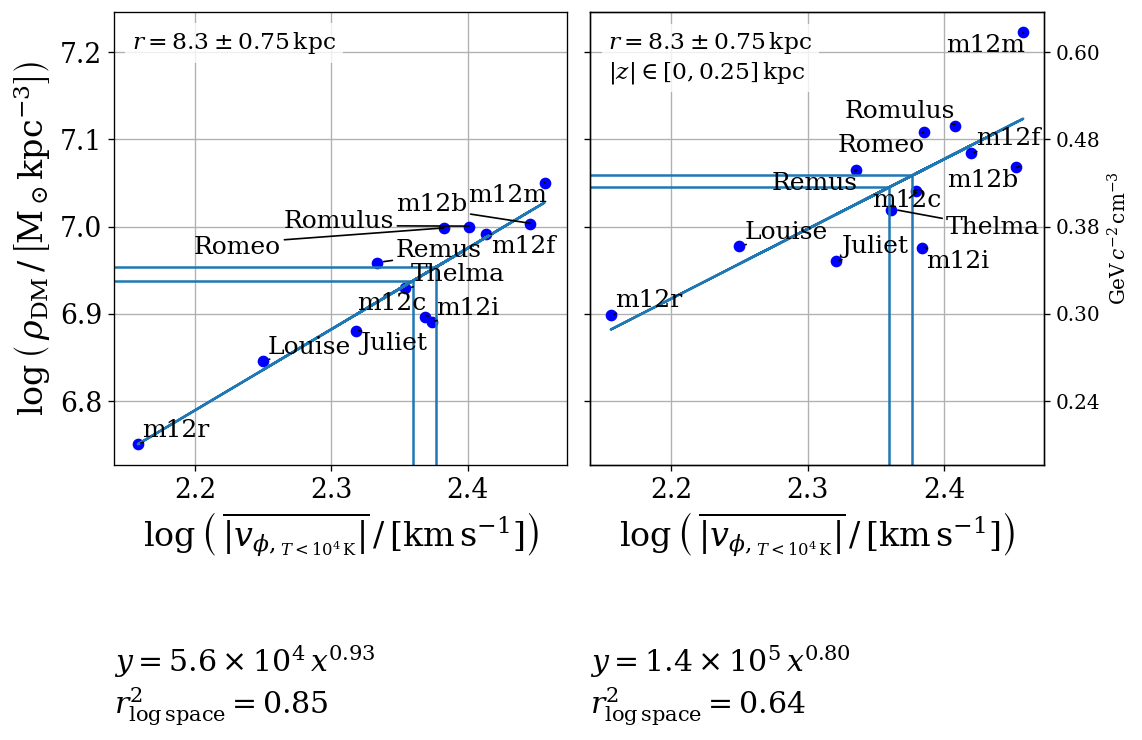

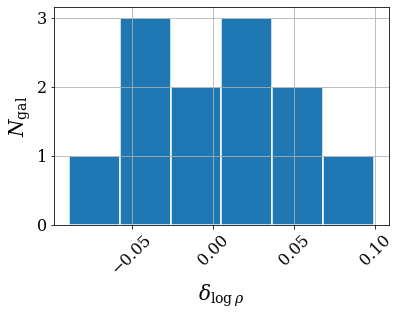

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [499]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True,
                        dpi=120)
fig.subplots_adjust(wspace=0.05)
axs = axs.ravel()

reg_shell = dm_den_viz.ax_slr(axs[0], 'dm_stats_20220629.h5',
                              'v_dot_phihat_shell(T<=1e4)',
                              'den_shell',
                              xlabel=v_1e4_label,
                              ylabel=den_label,
                              xadjustment='log', yadjustment='log',
                              formula_y=-0.55, dropgals=['m12w','m12z'],
                              arrowprops={'arrowstyle':'-'},
                              showGeV=False)
axs[0].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$'\
                            .format(df.attrs['dr']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

reg_disc = dm_den_viz.ax_slr(axs[1],'dm_stats_20220629.h5',
                             'v_dot_phihat_disc(T<=1e4)',
                             'den_disc',
                             xlabel=v_1e4_label,
                             ylabel=den_label,
                             xadjustment='log', yadjustment='log',
                             formula_y=-0.55, dropgals=['m12w','m12z'],
                             arrowprops={'arrowstyle':'-'})
axs[1].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$\n'
                '$|z|\in[0,{1:0.2f}]\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.,
                                                            df.attrs['dz']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[1].set_ylabel('')

ylim = axs[0].get_ylim()
xlim = axs[0].get_xlim()
    
for vcirc in [229., 238.]:
    plt_mw(axs[0], vcirc, reg_shell)
    plt_mw(axs[1], vcirc, reg_disc)

plt.show()


################################################################################
# Errors
################################################################################
df['den_errors_disc'] = np.log10(df['den_disc']) \
                    - regress_line(df['v_dot_phihat_disc(T<=1e4)'], 
                                   reg_disc)

plt.hist(df['den_errors_disc'].drop(['m12w','m12z']), bins=6, ec='w',
         lw=1.5)
plt.ylabel('$N_\mathrm{gal}$')
plt.xlabel('$\delta_{\log\\rho}$')
plt.xticks(rotation=45)
plt.savefig(paths.figures+'rho_errors.png',
            bbox_inches='tight',
            dpi=120)
plt.show()

delta_neg = np.percentile(df['den_errors_disc'], (1.-0.682)/2.*100.)
delta_pos = np.percentile(df['den_errors_disc'], (1.-(1.-0.682)/2.)*100.)

print_eq('\delta_-',delta_neg,1)
print_eq('\delta_+',delta_pos,1)
print_eq('\delta',np.mean(np.abs((delta_neg, delta_pos))),1)

## Colder Gas

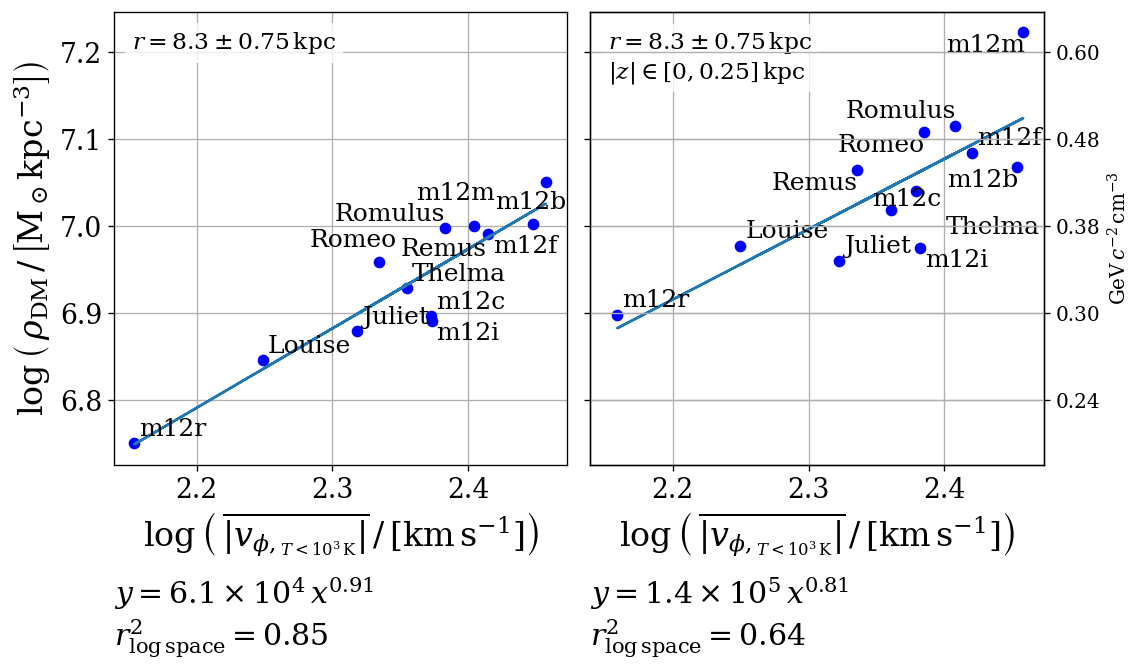

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True, 
                        dpi=120)
fig.subplots_adjust(wspace=0.05)
axs = axs.ravel()

textxy = (0.04, 0.96)
fontsize = 14
dm_den_viz.ax_slr(axs[0], 'dm_stats_20220629.h5',
                   'v_dot_phihat_shell(T<=1e3)',
                   'den_shell',
                   xlabel=v_1e3_label,
                   ylabel=den_label,
                   xadjustment='log', yadjustment='log',
                   formula_y=-0.4, dropgals=['m12w','m12z'],
                   showGeV=False)

dm_den_viz.ax_slr(axs[1],'dm_stats_20220629.h5',
                   'v_dot_phihat_disc(T<=1e3)',
                   'den_disc',
                   xlabel=v_1e3_label,
                   ylabel=den_label,
                   xadjustment='log', yadjustment='log',
                   formula_y=-0.4, dropgals=['m12w','m12z'])

axs[0].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[1].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$\n'
                '$|z|\in[0,{1:0.2f}]\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.,
                                                          df.attrs['dz']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[1].set_ylabel('')
plt.show()

## Shell vs. Disc Density difference

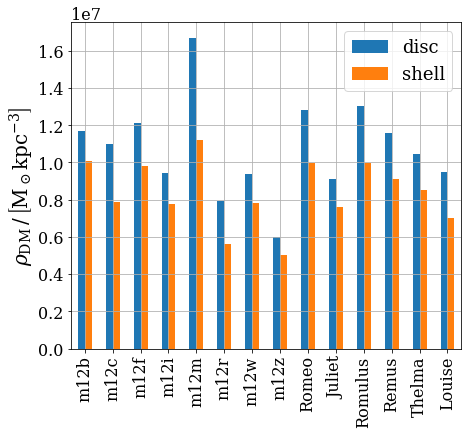

In [9]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
df[['den_disc', 
    'den_shell']].plot.bar(ax=ax)
ax.legend(['disc','shell'])
ax.set_ylabel(den_label)
plt.show()

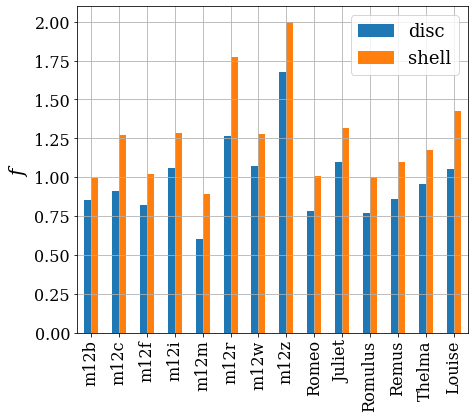

In [10]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
df[['f_disc', 
    'f_shell']].plot.bar(ax=ax)
ax.legend(['disc','shell'])
ax.set_ylabel('$f$')
plt.show()

# Disc Diffs

In [9]:
from importlib import reload
reload(dm_den)
den_disp_dict = dm_den.den_disp_phi_bins('dm_stats_20220715.h5',
                                         'den_disp_dict_20220818.pkl')

100% |########################################################################|


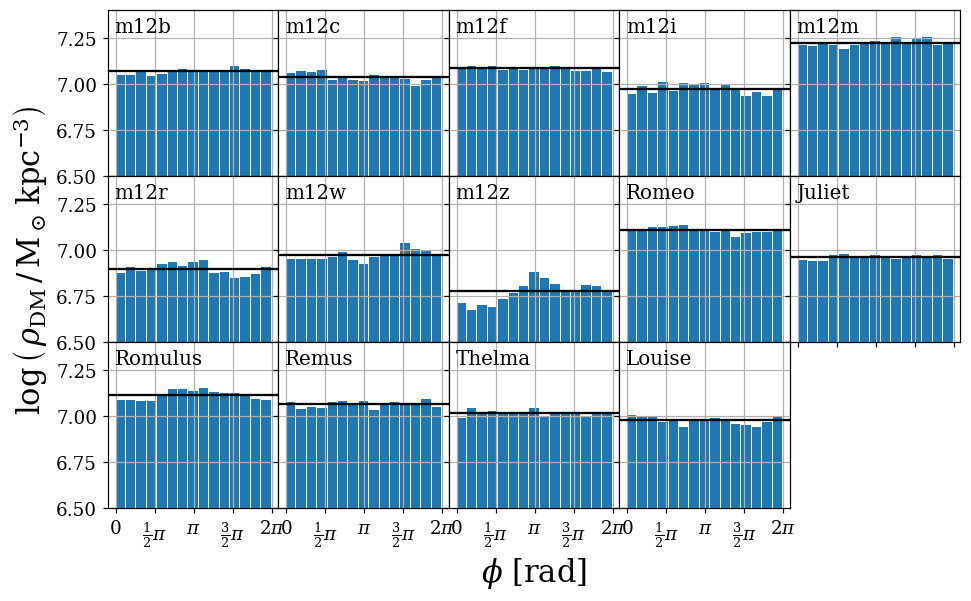

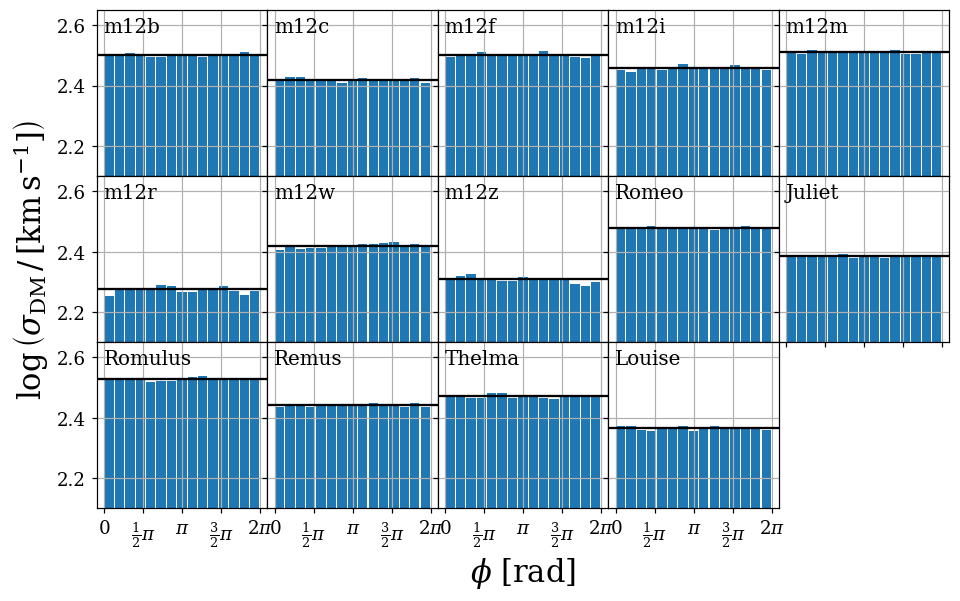

In [358]:
def vs_phi(tgt):
    fig,axs = plt.subplots(3, 5, figsize=(10,6), sharey=True, sharex=True,
                           dpi=110)
    fig.subplots_adjust(wspace=0.0, hspace=0.0)
    axs = axs.ravel()  

    axs[-3].set_xlabel('$\phi$ [rad]')
    if tgt=='den':
        axs[5].set_ylabel('$\log\\left(\,\\rho_\mathrm{DM}\,'
                          '/\,\mathrm{M_\odot\,kpc^{-3}}\\right)$')
    elif tgt=='disp':
        axs[5].set_ylabel('$\log\\left('+disp_label.replace('$','')+'\\right)$')

    for k, galname in enumerate(df.index):
        phi_bins = den_disp_dict[galname]['phi_bins']
            
        if tgt=='den':
            x = den_disp_dict[galname]['dens']
            col = 'den_disc'
            axs[0].set_ylim(6.5,7.4)
        elif tgt=='disp':
            x = den_disp_dict[galname]['disps']
            col = 'disp_dm_disc_cyl'
            axs[0].set_ylim(2.1,2.65)
        axs[k].bar(phi_bins[:-1], np.log10(x), align='edge', 
        #axs[k].bar(phi_bins[:-1], x, align='edge', 
                width=(phi_bins[1]-phi_bins[0])*0.9)            
        axs[k].axhline(np.log10(df.loc[galname,col]), color='k')
        #axs[k].axhline(df.loc[galname,col], color='k')
        axs[k].tick_params(axis='both', which='major', labelsize=12)

        axs[k].annotate(galname,
                        (0.04, 0.96),
                        xycoords='axes fraction', fontsize=13,
                        horizontalalignment='left',
                        verticalalignment='top')

    xticks = np.linspace(0., 2.*np.pi, 5)
    labels = ['$0$', '$\\frac{1}{2}\pi$', '$\pi$', '$\\frac{3}{2}\pi$',
              '$2\pi$']
    axs[0].set_xticks(xticks, labels=labels)
    axs[-1].remove()
    plt.show()
    
    return None

vs_phi('den')
vs_phi('disp')

In [22]:
reload(dm_den_viz)

<module 'dm_den_viz' from '/nfspool-0/home/pstaudt/projects/project01/dm_den_viz.py'>

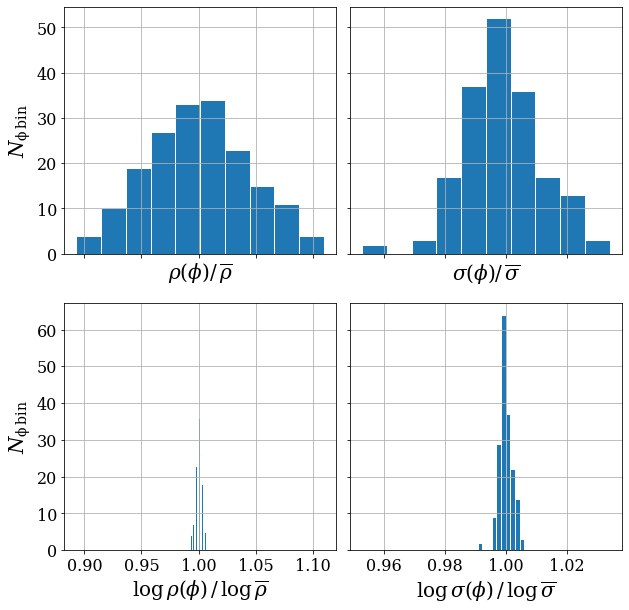

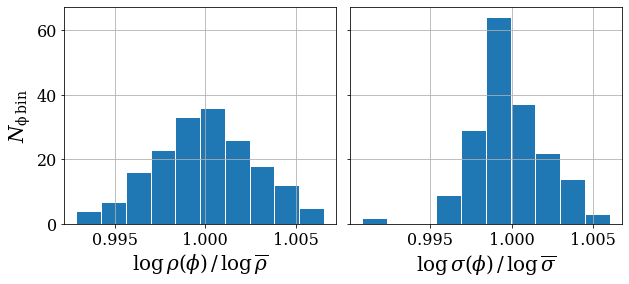

In [23]:
dm_den_viz.plt_disc_diffs()
dm_den_viz.plt_disc_diffs(only_log=True)

## Testing different numbers of $\phi$ bins

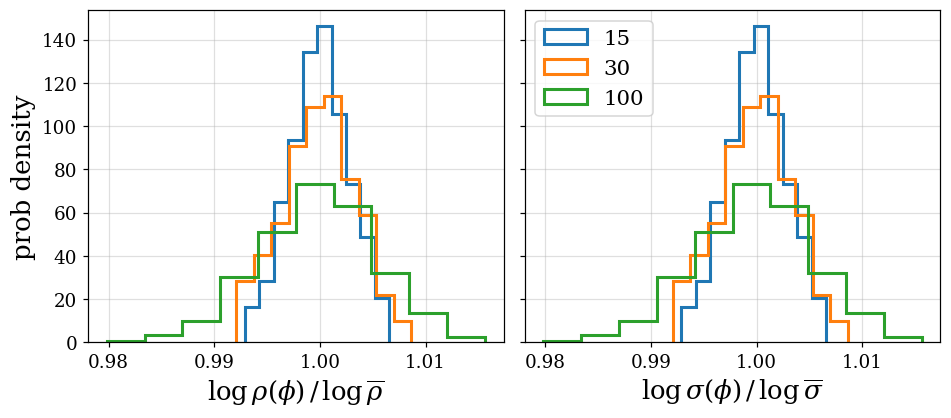

In [19]:
galnames = df_drop.index
Nbins=10
lw=2.

fig, axs = plt.subplots(1, 2, figsize=(10,4), sharey=True, dpi=110.)
fig.subplots_adjust(wspace=0.05)
for N, fname in zip([15,30,100],
                    ['den_disp_dict_20220818.pkl',
                     'den_disp_dict_N30_20220927.pkl',
                     'den_disp_dict_N100_20220927.pkl']):
    with open('./data/'+fname, 'rb') as f:
        den_disp_dict = pickle.load(f)
    dens = np.array([den_disp_dict[galname]['log(dens)/log(avg)'] \
                     for galname in galnames]).flatten()
    disps = np.array([den_disp_dict[galname]['log(dens)/log(avg)'] \
                      for galname in galnames]).flatten()
    
    axs[0].hist(dens, Nbins, density=True, histtype='step', lw=lw)
    axs[1].hist(disps, Nbins, density=True, histtype='step', lw=lw, label=N)
axs[1].legend()
axs[0].set_ylabel('prob density')
axs[0].set_xlabel('$\log\\rho(\phi)\,/\,\log\overline{\\rho}$')
axs[1].set_xlabel('$\log\sigma(\phi)\,/\,\log\overline{\sigma}$')
for ax in axs:
    ax.grid(alpha=0.4)
plt.show()

# Dispersion verses density

====  =========  ========  ========  ===========
..        coeff       +/-    t-stat     p-values
====  =========  ========  ========  ===========
X_0   -3.11796   1.40434    4.94699  0.000581121
X_1    0.801854  0.202547   8.82088  4.95605e-06
====  =========  ========  ========  ===========
t_c = 2.2
t-test type: 2 tailed, 5% significance

=======  =======  ==============
      F      F_c    significance
=======  =======  ==============
77.8079  10.0443            0.01
=======  =======  ==============
r2 = 0.89
r2a = 0.87
====  =========  ========  ========  ==========
..        coeff       +/-    t-stat    p-values
====  =========  ========  ========  ==========
X_0   -2.47085   2.39148    2.30209   0.0440975
X_1    0.697818  0.339459   4.58034   0.0010101
====  =========  ========  ========  ==========
t_c = 2.2
t-test type: 2 tailed, 5% significance

=======  =======  ==============
      F      F_c    significance
=======  =======  ==============
20.9795  10.0443            0.01


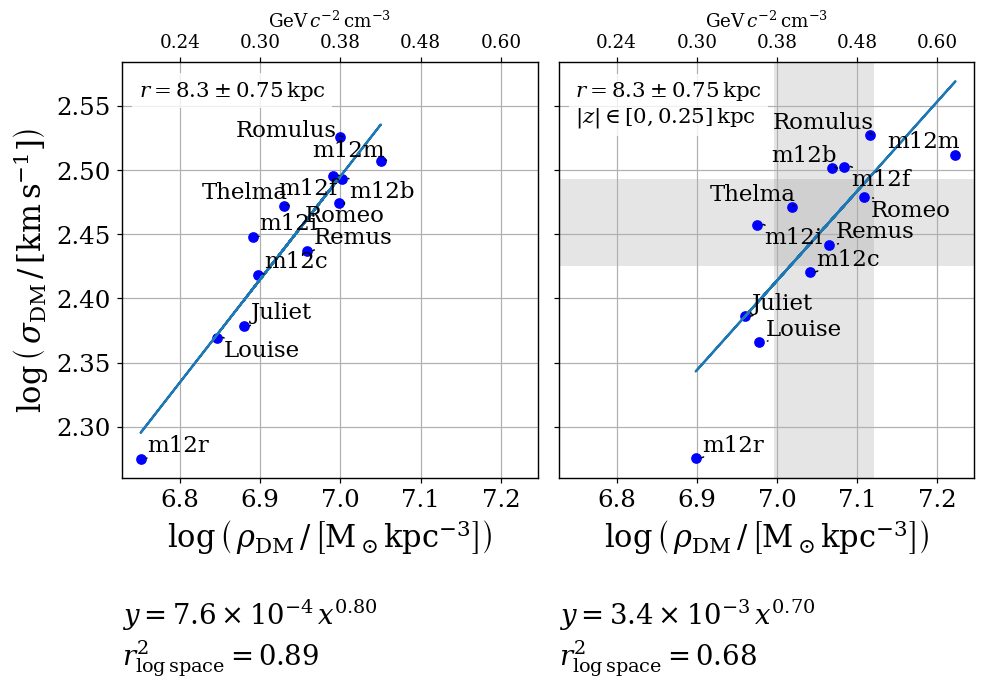

In [219]:
reload(dm_den)
reload(dm_den_viz)

fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey=True, sharex=True, 
                        dpi=110)
fig.subplots_adjust(wspace=0.05)
axs = axs.ravel()

dm_den_viz.ax_slr(axs[0],
                  'dm_stats_20220629.h5', 
                  'den_shell',
                  'disp_dm_shell_cyl',
                  ylabel = disp_label,
                  xlabel = den_label,
                  xadjustment='log', yadjustment='log',
                  dropgals=['m12w','m12z'],
                  formula_y=-0.45, showGeV=False, arrowprops={'arrowstyle':'-'})
dm_den_viz.ax_slr(axs[1],
                  'dm_stats_20220629.h5', 
                  'den_disc',
                  'disp_dm_disc_cyl',
                  ylabel = disp_label,
                  xlabel = den_label,
                  xadjustment='log', yadjustment='log',
                  dropgals=['m12w','m12z'],
                  formula_y=-0.45, showGeV=False, arrowprops={'arrowstyle':'-'})

axs[1].axvspan(den_hat[0]-den_hat[1], 
            den_hat[0]+den_hat[1], 
            alpha=0.2, color='gray', ls='none')
axs[1].axhspan(disp_hat[0]-disp_hat[1],
               disp_hat[0]+disp_hat[1],
               alpha=0.2, color='gray', ls='none')

axs[0].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
axs[1].annotate('$r=8.3\pm{0:0.2f}\,\mathrm{{kpc}}$\n'
                '$|z|\in[0,{1:0.2f}]\,\mathrm{{kpc}}$'.format(df.attrs['dr']/2.,
                                                          df.attrs['dz']/2.),
                textxy,
                xycoords='axes fraction', fontsize=fontsize,
                horizontalalignment='left',
                verticalalignment='top',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

axs[1].set_ylabel('')
axs[1].locator_params(axis='x', nbins=6) #Increase the number of ticks
for ax in axs:
    dm_den_viz.showGeV_x(ax, xadjustment='log')

plt.show()

In [40]:
_ = dm_den.mlr('dm_stats_20220629.h5', xcols=['disp_dm_shell_cyl'],
               ycol='den_disc', xscales=['log'], yscale='log',
               dropgals=['m12w','m12z'],
               prediction_x=[10.**disp_hat[0]], dX=[0.], f_sig=0.05)

====  ========  ========  ========  ===========
..       coeff       +/-    t-stat     p-values
====  ========  ========  ========  ===========
X_0   4.60837   1.15519    8.88864  4.62758e-06
X_1   0.997904  0.473014   4.70065  0.000840743
====  ========  ========  ========  ===========
t_c = 2.2
t-test type: 2 tailed, 5% significance

=======  =======  ==============
      F      F_c    significance
=======  =======  ==============
22.0961  10.0443            0.01
=======  =======  ==============
r2 = 0.69
r2a = 0.66

=======  ========
    x_i     coeff
=======  ========
1        4.60837
2.45899  0.997904
=======  ========
=======  =======  =====================  ===============  ==================  ===========
   yhat      t_c    std err of forecast    t_c * std err    dY/dX1 * err(X1)    err(yhat)
=======  =======  =====================  ===============  ==================  ===========
7.06221  2.22814              0.0526271         0.117261                   0     0.117261
======= 